In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
data = scipy.io.loadmat("..\data\EEGrestingState.mat")

dataR = data["eegdata"][0]
srate = data["srate"][0]

npnts = len(dataR)
time = np.arange(0,npnts)/srate

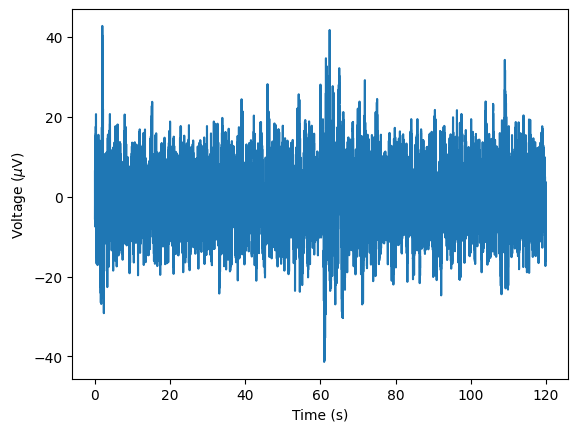

In [3]:
plt.plot(time, dataR)
plt.xlabel("Time (s)")
plt.ylabel("Voltage ($\mu$V)")
plt.show()

In [4]:
eegpow = np.abs( scipy.fftpack.fft(dataR)/npnts )**2
hz = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))

C:\Users\kerem\AppData\Local\Temp\ipykernel_4280\1119790822.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  winlength = int( 1*srate )
C:\Users\kerem\AppData\Local\Temp\ipykernel_4280\1119790822.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  winonsets = np.arange(0,int(npnts-winlength),int(winlength-nOverlap))


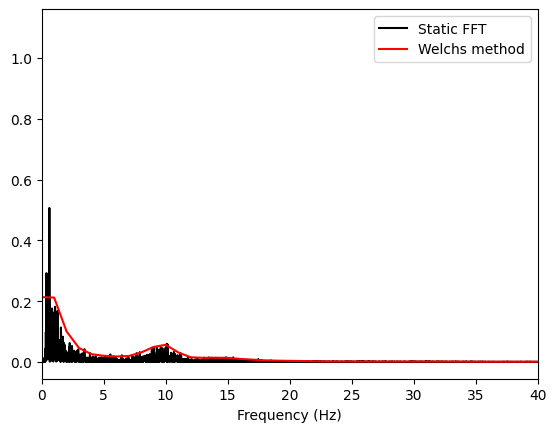

In [5]:
winlength = int( 1*srate )

nOverlap = np.round(srate/2)

winonsets = np.arange(0,int(npnts-winlength),int(winlength-nOverlap))

hzW = np.linspace(0,srate/2,int(np.floor(winlength/2)+1))

hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,int(winlength)))/2

eegpowW = np.zeros(len(hzW))

for wi in range(0,len(winonsets)):
    
    datachunk = dataR[ winonsets[wi]:winonsets[wi]+winlength ]
    
    datachunk = datachunk * hannw
    
    tmppow = np.abs(scipy.fftpack.fft(datachunk)/winlength)**2
    
    eegpowW = eegpowW  + tmppow[0:len(hzW)]

eegpowW = eegpowW / len(winonsets)

plt.plot(hz,eegpow[0:len(hz)],"k",label="Static FFT")
plt.plot(hzW,eegpowW/10,"r",label="Welch""s method")
plt.xlim([0,40])
plt.xlabel("Frequency (Hz)")
plt.legend()
plt.show()

C:\Users\kerem\AppData\Local\Temp\ipykernel_4280\2947930974.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  winsize = int( 2*srate )


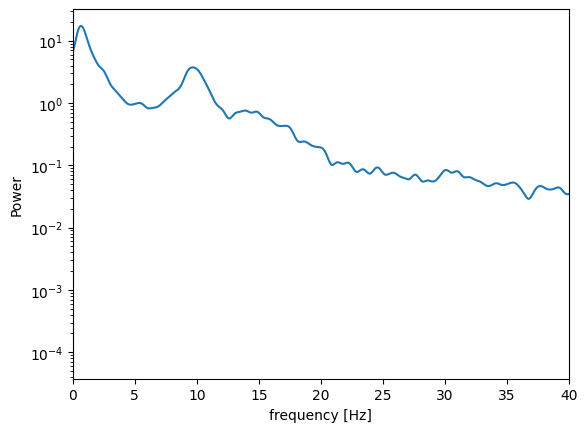

In [6]:
winsize = int( 2*srate ) 
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,winsize))/2


nfft = srate*100

f, welchpow = scipy.signal.welch(dataR,fs=srate,window=hannw,nperseg=winsize,noverlap=winsize/4,nfft=nfft)

plt.semilogy(f,welchpow)
plt.xlim([0,40])
plt.xlabel('frequency [Hz]')
plt.ylabel('Power')
plt.show()